### p73 선형 회귀 모델
- 데이터를 선형 함수로 모델링
- 최소제곱법 : 평균제곱오차를 최소화하는 파라미터를 찾는다
  - 파라미터를 줄이고 키우고를 반복한다(예시)
  - 오차를 파라미터로 미분한 값만큼 조절을 반복한다(경사하강법)
  - 정규방정식으로 찾기(데이터가 많아지면 메모리 부족으로 사용 불가)
- 평균제곱오차 : 오차(예측과 정답의 차이)를 제곱 > 모든 샘플들의 오차를 평균

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# 키와 몸무게, 몸무게로부터 키를 예측해보자
몸무게 = [30,60,70,90]
키 = [120,160, 170, 190]
몸무게_test = [65, 80] # 이 두사람의 키는 어떻게 될까?

In [10]:
# 4행 1열(ok) / 1행 4열(wrong)
몸무게 = np.array(몸무게).reshape((-1,1))
키 = np.array(키)
몸무게_test = np.array(몸무게_test).reshape((-1,1))

In [11]:
#76 모델 선택
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=몸무게, y=키) # Y = w*x+b 에서 w와 b를 조절하는 것

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
몸무게_test, lr.predict(몸무게_test)

(array([[65],
        [80]]), array([162.93333333, 180.53333333]))

In [14]:
lr.score(몸무게, 키) # 결정계수 max 1

0.9928205128205129

In [16]:
#계수 w 와 절편 b ,  Y = wx + b = 1.17 * x + 86.6
lr.coef_, lr.intercept_

(array([1.17333333]), 86.66666666666667)

In [17]:
lr.coef_ * 몸무게 + lr.intercept_ # Y = w * x + b

array([[121.86666667],
       [157.06666667],
       [168.8       ],
       [192.26666667]])

In [18]:
키

array([120, 160, 170, 190])

## LinearRegression 으로  내일의 종가 예측
- 입력(X:하루 전 데이터), 출력(Y:다음 날의 종가)
- 데이터 총 m = 10, 학습용 8, 테스트 2
- 정규화는 일단 생략

In [71]:
url='https://finance.daum.net/domestic/kospi200'
url='코스피200 _ 다음 금융.html'#웹페이지를 다른 이름으로 저장
tables = pd.read_html(url, index_col=0)
len(tables)

3

In [75]:
df = tables[1]

In [76]:
#전처리 : 전일비와 등락률을 수치데이터로 변환
df['전일비'] = df['전일비'].replace('▼','-',regex=True)
df['전일비'] = df['전일비'].replace('▲','',regex=True)
df['등락률'] = df['등락률'].replace('%','',regex=True)
df['전일비'] = df['전일비'].astype(np.float)
df['등락률'] = df['등락률'].astype(np.float)

In [96]:
#min max 정규화 [0,1]
minimum = np.min(df, axis=0)
maximum = np.max(df, axis=0)
df_norm = (df - minimum) / (maximum-minimum)

In [97]:
# X 와 y 를 분리
X = df_norm.iloc[1:]#오늘 데이터 제외
y = df_norm.iloc[:-1, 0]#가장 오래된 데이터와 종가 외의 컬럼 제외
X.shape, y.shape

((9, 8), (9,))

In [98]:
#Train / Test 용 분리
offset = 2
X_train = X[offset:]#예전
X_test = X[:offset]#최근
y_train = y[offset:]#예전
y_test = y[:offset]#최근

In [99]:
'''
train 셋으로 Linear Regression 모델 fit
78 릿지(ridge)모델 : w 를 가능한한 작게 만드는 LinearRegression
   규제(regularization)
W 를 줄인다는 것은 Y를 예측하는 데 가능한한 모든 특성을 반영해라
Y = w1 * x1 + w2 * x2 + ..... wi*xi + b
'''
from sklearn.linear_model import LinearRegression, Ridge
lr = Ridge().fit(X_train, y_train)

In [100]:
#score 측정, LR -2만점, Ridge -14점
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.2529211781296403, -14.132619553803877)

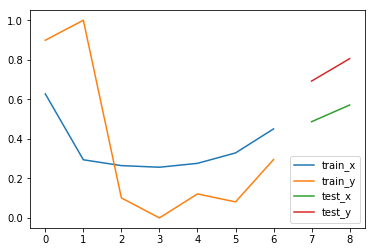

In [106]:
#예측을 그래프로 시각화
train_len = np.arange(len(X_train))
test_len = np.arange(len(X_train), len(X_train) + len(X_test))
plt.plot(train_len, lr.predict(X_train), label='train_x')
plt.plot(train_len, y_train, label='train_y')
plt.plot(test_len, lr.predict(X_test), label='test_x')
plt.plot(test_len, y_test, label='test_y')
plt.legend()